In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
%matplotlib inline

In [5]:
df = pd.read_csv('household_power_consumption.txt')

In [6]:
df.to_csv('household_power_consumption.csv', index=None)

In [7]:
df1 = pd.read_csv('household_power_consumption.txt', delimiter=';')
df1.to_csv('household.csv')


C:\Users\YOGESH V\AppData\Local\Temp\ipykernel_2528\4155364032.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('household_power_consumption.txt', delimiter=';')


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [9]:
df1.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [10]:
df1.loc[df1.Sub_metering_3.isnull()].head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,21/12/2006,11:23:00,?,?,?,?,?,?,NaN
6840,21/12/2006,11:24:00,?,?,?,?,?,?,NaN
19724,30/12/2006,10:08:00,?,?,?,?,?,?,NaN
19725,30/12/2006,10:09:00,?,?,?,?,?,?,NaN
41832,14/1/2007,18:36:00,?,?,?,?,?,?,NaN


In [11]:
df1.replace('?', np.nan, inplace=True)

In [12]:
df1.loc[df1.Sub_metering_3.isnull()].head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,21/12/2006,11:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6840,21/12/2006,11:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19724,30/12/2006,10:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19725,30/12/2006,10:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41832,14/1/2007,18:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#drop all NaN values
df1 = df1.dropna(how = 'all')

In [14]:
df1 = df1.drop(['Date'], axis=1)

In [15]:
df1 = df1.drop(['Time'], axis=1)

In [16]:
for i in df1.columns:
    df1[i] = df1[i].astype('float64')

In [17]:
df1.shape

(2075259, 7)

In [18]:
values = df1.values

In [19]:
df1['Sub_metering_4'] = (values[:,0]*1000/60) - (values[:,4] + values[:,5] + values[:,6])

In [20]:
df1.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
Sub_metering_4           float64
dtype: object

In [21]:
df1.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
Global_active_power,1.000000,0.247017,-0.399762,0.998889,0.484401,0.434569,0.638555,0.701380
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120,0.123111,0.139231,0.089617,0.211624
Voltage,-0.399762,-0.112246,1.000000,-0.411363,-0.195976,-0.167405,-0.268172,-0.271371
Global_intensity,0.998889,0.266120,-0.411363,1.000000,0.489298,0.440347,0.626543,0.703258
Sub_metering_1,0.484401,0.123111,-0.195976,0.489298,1.000000,0.054721,0.102571,0.125067
Sub_metering_2,0.434569,0.139231,-0.167405,0.440347,0.054721,1.000000,0.080872,0.085201
Sub_metering_3,0.638555,0.089617,-0.268172,0.626543,0.102571,0.080872,1.000000,0.178724
Sub_metering_4,0.701380,0.211624,-0.271371,0.703258,0.125067,0.085201,0.178724,1.000000


In [22]:
df1.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00,9.314693e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00,9.585916e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-2.400000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.800000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.500000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,1.036667e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,1.248333e+02


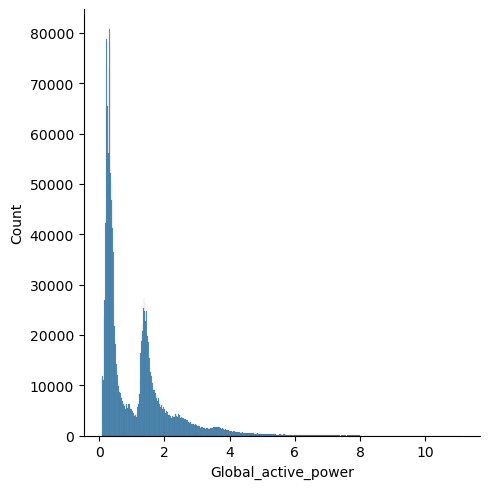

In [23]:
sns.displot(df1['Global_active_power'])

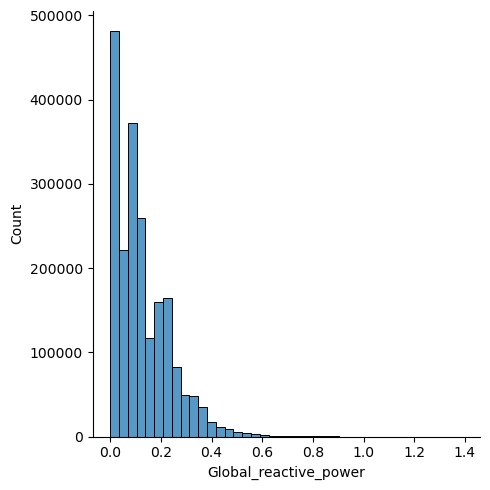

In [24]:
sns.displot(df1['Global_reactive_power'], kde=False, bins=40)

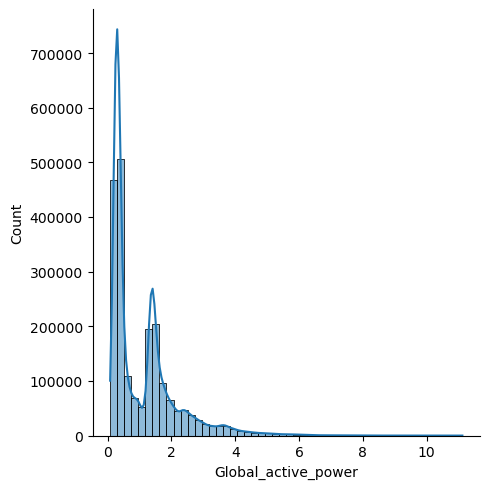

In [25]:
sns.displot(df1['Global_active_power'],bins=50, kde=True)

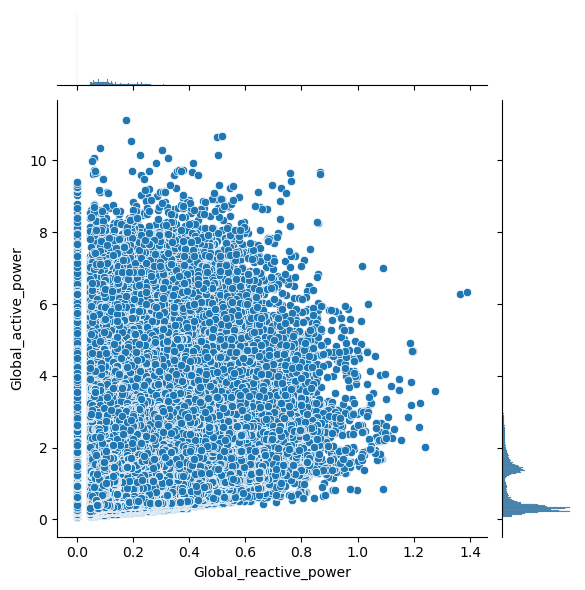

In [26]:
sns.jointplot(x='Global_reactive_power', y='Global_active_power', data=df1, kind='scatter')

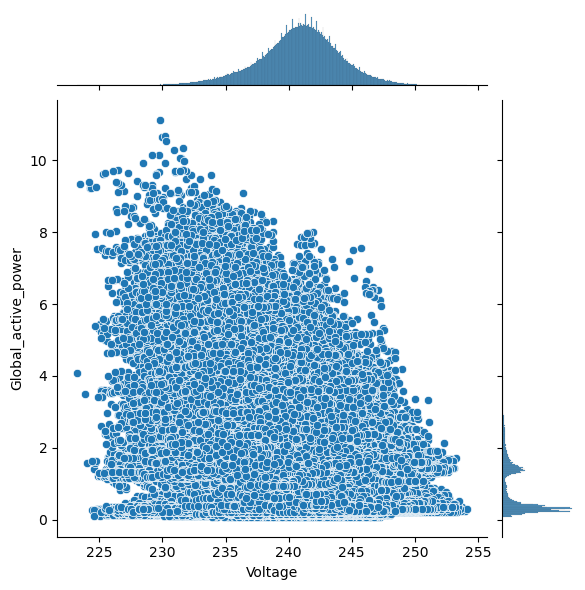

In [27]:
sns.jointplot(x='Voltage', y='Global_active_power', data=df1, kind='scatter')

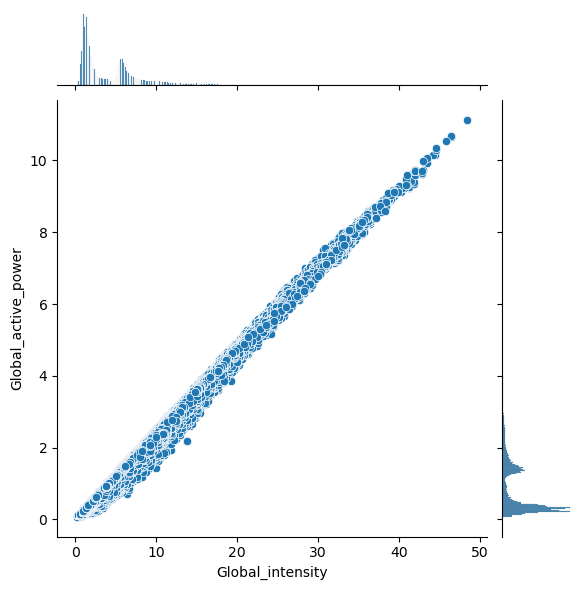

In [28]:
sns.jointplot(x='Global_intensity', y='Global_active_power', data=df1, kind='scatter')

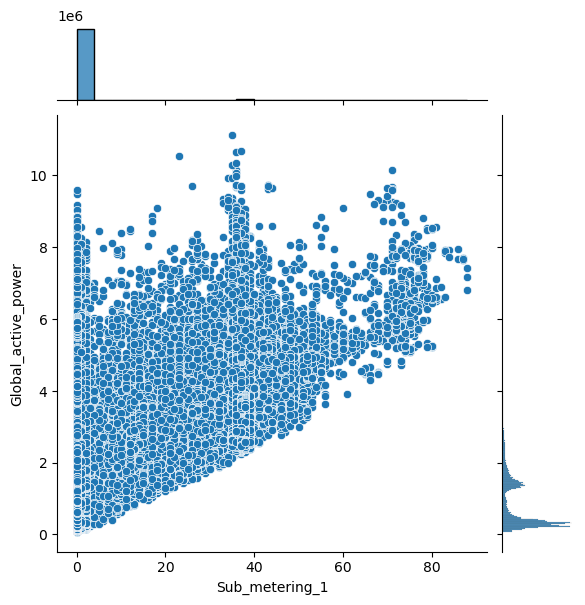

In [29]:
sns.jointplot(x='Sub_metering_1', y='Global_active_power', data=df1, kind='scatter')

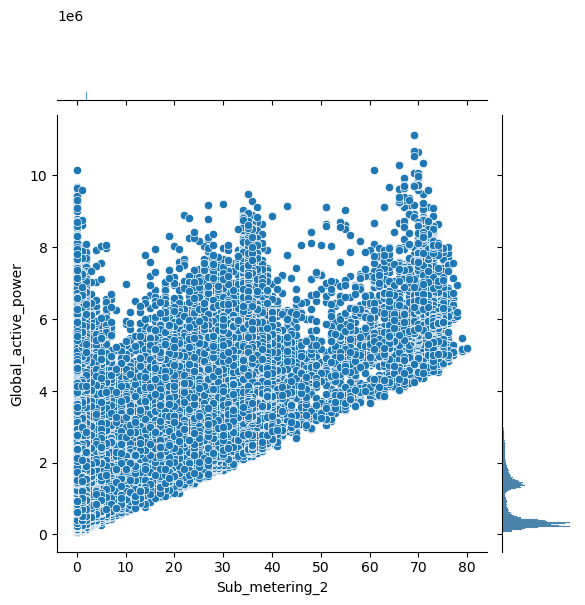

In [30]:
sns.jointplot(x='Sub_metering_2', y='Global_active_power', data=df1, kind='scatter')

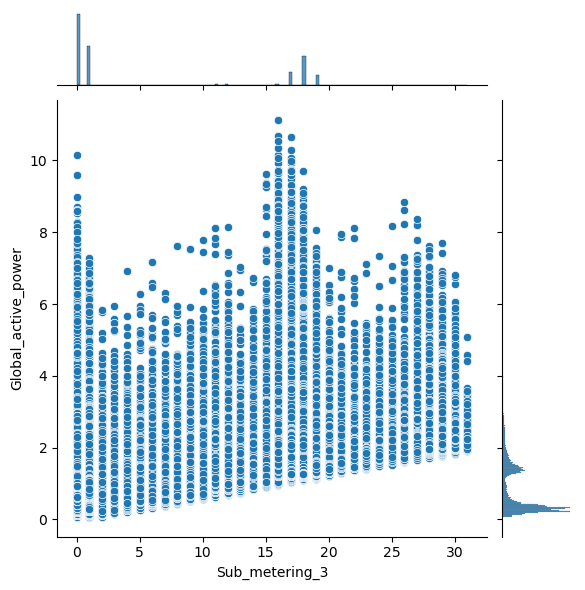

In [31]:
sns.jointplot(x='Sub_metering_3', y='Global_active_power', data=df1, kind='scatter')

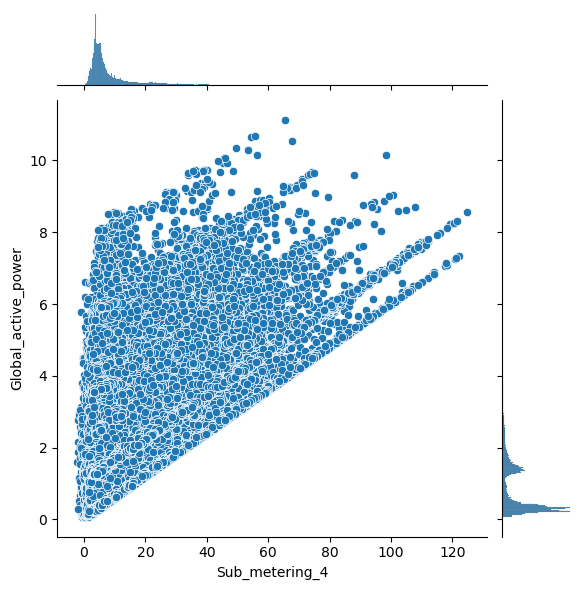

In [32]:
sns.jointplot(x='Sub_metering_4', y='Global_active_power', data=df1, kind='scatter')

<Axes: >

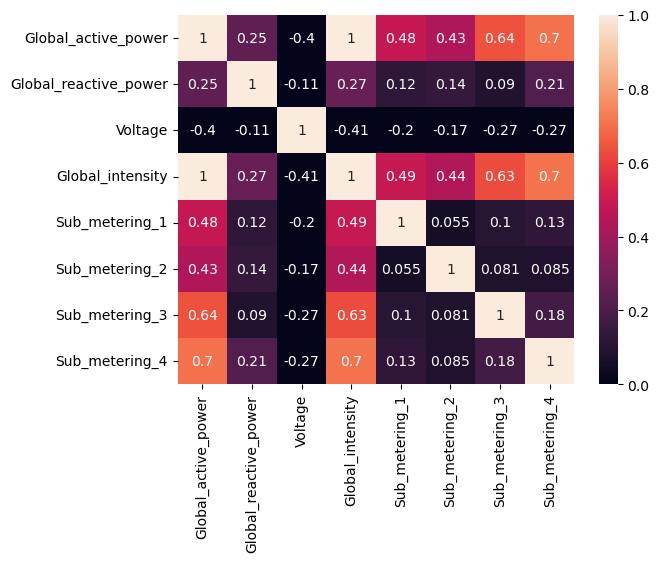

In [33]:
sns.heatmap(df1.corr(),vmax=1,vmin=0,annot=True,cbar=True,mask=False)

In [34]:
X = df1[['Global_reactive_power','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']]

In [35]:
y = df1['Global_active_power']

In [36]:
X.head()

,Global_reactive_power,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0.418,18.4,0.0,1.0,17.0
1,0.436,23.0,0.0,1.0,16.0
2,0.498,23.0,0.0,2.0,17.0
3,0.502,23.0,0.0,1.0,17.0
4,0.528,15.8,0.0,1.0,17.0


In [37]:
y.head()

0    4.216
1    5.360
2    5.374
3    5.388
4    3.666
Name: Global_active_power, dtype: float64

In [38]:
X = np.nan_to_num(X)
y = np.nan_to_num(y)

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state = 30)

In [41]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1452681, 5)
(1452681,)
(622578, 5)
(622578,)


In [42]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)
Linear_predictions = lm.predict(X_test)

In [43]:
Linear_predictions

array([0.24149223, 1.56071471, 0.29099517, ..., 0.24366186, 0.32386355,
       0.34309327])

In [44]:
from xgboost import XGBRegressor
model2 = XGBRegressor()
model2.fit(X_train,y_train)
y_predict2 = model2.predict(X_test)

In [45]:
y_predict2

array([0.23378922, 1.5618823 , 0.27968183, ..., 0.24317645, 0.32875305,
       0.32390097], dtype=float32)

In [46]:
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor()
model1.fit(X_train,y_train)
y_predict1 = model1.predict(X_test)

In [47]:
y_predict1

array([0.23347312, 1.56504383, 0.27968445, ..., 0.2443004 , 0.32859785,
       0.31936291])

In [48]:
from sklearn.linear_model import Ridge
model3 = Ridge()
model3.fit(X_train,y_train)
y_predict3 = model3.predict(X_test)

In [49]:
y_predict3

array([0.24149121, 1.56071351, 0.29099416, ..., 0.24366087, 0.32386321,
       0.34309459])

In [50]:
#Linear Regression model Evaluation
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,Linear_predictions))
print("MSE:",metrics.mean_squared_error(y_test,Linear_predictions))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,Linear_predictions)))
print("RSquarevalue:",metrics.r2_score(y_test,Linear_predictions))

MAE: 0.02711746760286949
MSE: 0.0017725325026184174
RMSE: 0.04210145487531776
RSquarevalue: 0.9984104542302936


In [51]:
#XGBRegressor model Evaluation
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,y_predict2))
print("MSE:",metrics.mean_squared_error(y_test,y_predict2))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_predict2)))
print("RSquarevalue:",metrics.r2_score(y_test,y_predict2))

MAE: 0.02057107176535367
MSE: 0.0011083153110183221
RMSE: 0.03329136991801813
RSquarevalue: 0.9990061012074376


In [52]:
#RandomForestRegressor model Evaluation
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,y_predict1))
print("MSE:",metrics.mean_squared_error(y_test,y_predict1))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_predict1)))
print("RSquarevalue:",metrics.r2_score(y_test,y_predict1))

MAE: 0.02110122676379929
MSE: 0.0012311918844803145
RMSE: 0.03508834399740624
RSquarevalue: 0.9988959097512844


In [53]:
#Ridge Regression model Evaluation
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,y_predict3))
print("MSE:",metrics.mean_squared_error(y_test,y_predict3))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_predict3)))
print("RSquarevalue:",metrics.r2_score(y_test,y_predict3))

MAE: 0.027117476647276557
MSE: 0.0017725324897610276
RMSE: 0.042101454722622444
RSquarevalue: 0.9984104542418236


In [57]:
#hyperparameter tuning
from sklearn.model_selection import cross_val_score

In [55]:
cv = cross_val_score(lm,X,y,cv=5)

In [59]:
np.mean(cv)

0.9983250762524924

In [68]:
cv1 = cross_val_score(model3,X,y,cv=5)

In [70]:
np.mean(cv1)

0.9983250760493775

In [72]:
import pickle
filename = 'PCASSS_model.pkl'
pickle.dump(lm,open(filename,'wb'))